In [31]:
# pip install imblearn

In [32]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
data2023 = pd.read_csv('2023/data2023')
data2020 = pd.read_csv('2020/data2020')
data2016 = pd.read_csv('2016/data2016')
data2012 = pd.read_csv('2012/data2012')

In [35]:
data = pd.concat([data2012, data2016, data2020])
data

,Percent Insurence: Under 19 years,Percent Insurence: 19 to 64 years,Percent Insurence: 65 years and older,Kindergarten,Elementary: grade 1 to grade 4,Elementary: grade 5 to grade 8,High school: grade 9 to grade 12,"College, undergraduate","Graduate, professional school",Population enrolled in college or graduate school,...,Two or more races:,Percent below poverty level: Population for whom poverty status is determined,Percent below poverty level: Less than high school graduate,Percent below poverty level: High school graduate (includes equivalency),"Percent below poverty level: Some college, associate's degree",Percent below poverty level: Bachelor's degree or higher,Percent below poverty level: Employed,Percent below poverty level: Unemployed,States,venceu
0,0.177632,0.577689,0.055556,0.485075,0.442029,0.306011,0.365385,0.087459,0.161739,0.093178,...,0.037844,0.633803,0.713483,0.489051,0.662921,0.500000,0.690141,0.804651,Alabama2012,1
1,0.822368,0.812749,0.333333,0.485075,0.500000,0.180328,0.307692,0.082508,0.151304,0.099834,...,0.027340,0.007042,0.129213,0.116788,0.000000,0.100000,0.098592,0.116279,Alaska2012,1
2,0.776316,0.717131,0.555556,0.186567,0.202899,0.065574,0.096154,0.067657,0.370435,0.111481,...,0.105849,0.612676,0.769663,0.562044,0.528090,0.833333,0.732394,0.725581,Arizona2012,1
3,0.296053,0.764940,0.111111,0.134328,0.340580,0.163934,0.185897,0.056106,0.092174,0.053245,...,0.027153,0.690141,0.662921,0.547445,0.764045,0.466667,0.774648,0.846512,Arkansas2012,1
4,0.427632,0.772908,0.833333,0.328358,0.260870,0.213115,0.205128,0.130363,0.553043,0.188020,...,1.000000,0.492958,0.466292,0.503650,0.528090,0.833333,0.591549,0.386047,California2012,0
5,0.486842,0.561753,0.222222,0.313433,0.188406,0.267760,0.217949,0.117162,0.361739,0.161398,...,0.095804,0.260563,0.483146,0.306569,0.370787,0.533333,0.535211,0.279070,Colorado2012,0
6,0.157895,0.298805,0.444444,0.604478,0.282609,0.229508,0.378205,0.417492,0.697391,0.470882,...,0.048636,0.049296,0.337079,0.160584,0.123596,0.000000,0.042254,0.102326,Connecticut2012,0
7,0.138158,0.294821,0.333333,0.835821,0.601449,0.562842,0.532051,0.150165,0.655652,0.226290,...,0.006793,0.140845,0.359551,0.000000,0.101124,0.333333,0.211268,0.060465,Delaware2012,0
8,0.019737,0.095618,0.222222,0.738806,1.000000,1.000000,0.653846,1.000000,1.000000,1.000000,...,0.001957,0.577465,0.910112,1.000000,1.000000,0.733333,0.338028,0.739535,District of Columbia2012,0
9,0.625000,0.932271,0.666667,0.492537,0.449275,0.366120,0.333333,0.202970,0.493913,0.239601,...,0.266960,0.500000,0.595506,0.503650,0.550562,0.933333,0.605634,0.600000,Florida2012,0


In [36]:
##quantidade de 0 e 1 na coluna venceu

data['venceu'].value_counts()

venceu
1    79
0    74
Name: count, dtype: int64

In [37]:
data = data.drop('States', axis=1)
data.head()

,Percent Insurence: Under 19 years,Percent Insurence: 19 to 64 years,Percent Insurence: 65 years and older,Kindergarten,Elementary: grade 1 to grade 4,Elementary: grade 5 to grade 8,High school: grade 9 to grade 12,"College, undergraduate","Graduate, professional school",Population enrolled in college or graduate school,...,Some other race alone,Two or more races:,Percent below poverty level: Population for whom poverty status is determined,Percent below poverty level: Less than high school graduate,Percent below poverty level: High school graduate (includes equivalency),"Percent below poverty level: Some college, associate's degree",Percent below poverty level: Bachelor's degree or higher,Percent below poverty level: Employed,Percent below poverty level: Unemployed,venceu
0,0.177632,0.577689,0.055556,0.485075,0.442029,0.306011,0.365385,0.087459,0.161739,0.093178,...,0.010408,0.037844,0.633803,0.713483,0.489051,0.662921,0.500000,0.690141,0.804651,1
1,0.822368,0.812749,0.333333,0.485075,0.500000,0.180328,0.307692,0.082508,0.151304,0.099834,...,0.001109,0.027340,0.007042,0.129213,0.116788,0.000000,0.100000,0.098592,0.116279,1
2,0.776316,0.717131,0.555556,0.186567,0.202899,0.065574,0.096154,0.067657,0.370435,0.111481,...,0.085422,0.105849,0.612676,0.769663,0.562044,0.528090,0.833333,0.732394,0.725581,1
3,0.296053,0.764940,0.111111,0.134328,0.340580,0.163934,0.185897,0.056106,0.092174,0.053245,...,0.011710,0.027153,0.690141,0.662921,0.547445,0.764045,0.466667,0.774648,0.846512,1
4,0.427632,0.772908,0.833333,0.328358,0.260870,0.213115,0.205128,0.130363,0.553043,0.188020,...,1.000000,1.000000,0.492958,0.466292,0.503650,0.528090,0.833333,0.591549,0.386047,0


In [38]:
X = data.drop('venceu', axis=1).values
y = data['venceu'].values

In [39]:
# from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Supondo que X_train e y_train sejam seus dados de treinamento

# # Aumentar o número de instâncias com RandomOverSampler
# ros = RandomOverSampler(sampling_strategy={0: 23700, 1: 22200}, random_state=42)  # Aumentando para 200 instâncias da classe 1
# X_reshaped, y_reshaped = ros.fit_resample(X, y)

# # Verificar a distribuição inicial
# print(f"Instâncias antes do RandomOverSampler: {X.shape[0]}")
# print(f"Instâncias após o RandomOverSampler: {X_reshaped.shape[0]}")
# print(f"Distribuição das classes após RandomOverSampler: {pd.Series(y_reshaped).value_counts()}")

# # Aplicar SMOTE para aumentar ainda mais as instâncias
# # smote = SMOTE(sampling_strategy={0: 23700, 1: 22200}, random_state=42)
# # X_smote, y_smote = smote.fit_resample(X_reshaped, y_train_resampled)

# # print(f"Instâncias após o SMOTE: {X_train_smote.shape[0]}")
# # print(f"Distribuição das classes após SMOTE: {pd.Series(y_train_smote).value_counts()}")

# #####melhor modelo usa 0:7500 e 1:750
# #####modelo mais correto usa 0:2370 e 1:2220

In [40]:
# X_new = X_reshaped

In [41]:
selecao = SelectKBest(score_func=chi2, k=8)
                      ##5 -> 0.785
                      ##8 -> 0.850
X_new = selecao.fit_transform(X, y)
selecionadas = selecao.get_support(indices=True)
colunas_selecionadas = data.columns[selecionadas]
print(colunas_selecionadas)
# colunas_selecionadas = X.columns[selecionadas]
# print(colunas_selecionadas)


Index(['Percent Insurence: Under 19 years',
       'Percent Insurence: 19 to 64 years', 'Graduate, professional school',
       'Population enrolled in college or graduate school',
       'Income per Race: White', 'Income per Race: Black or African American',
       'Income per Race: Asian', 'Percent below poverty level: Employed'],
      dtype='object')


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [43]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Supondo que X_train e y_train sejam seus dados de treinamento

# Aumentar o número de instâncias com RandomOverSampler
ros = RandomOverSampler(sampling_strategy={0: 23700, 1: 22200}, random_state=42)  # Aumentando para 200 instâncias da classe 1
X_train, y_train = ros.fit_resample(X_train, y_train)

# Verificar a distribuição inicial
print(f"Instâncias antes do RandomOverSampler: {X.shape[0]}")
print(f"Instâncias após o RandomOverSampler: {X_train.shape[0]}")
print(f"Distribuição das classes após RandomOverSampler: {pd.Series(y_train).value_counts()}")

# Aplicar SMOTE para aumentar ainda mais as instâncias
# smote = SMOTE(sampling_strategy={0: 23700, 1: 22200}, random_state=42)
# X_smote, y_smote = smote.fit_resample(X_reshaped, y_train_resampled)

# print(f"Instâncias após o SMOTE: {X_train_smote.shape[0]}")
# print(f"Distribuição das classes após SMOTE: {pd.Series(y_train_smote).value_counts()}")

#####melhor modelo usa 0:7500 e 1:750
#####modelo mais correto usa 0:2370 e 1:2220

Instâncias antes do RandomOverSampler: 153
Instâncias após o RandomOverSampler: 45900
Distribuição das classes após RandomOverSampler: 0    23700
1    22200
Name: count, dtype: int64


In [44]:
# from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Supondo que X_train e y_train sejam seus dados de treinamento

# # Aumentar o número de instâncias com RandomOverSampler
# ros = RandomOverSampler(sampling_strategy={0: 23700, 1: 22200}, random_state=42)  # Aumentando para 200 instâncias da classe 1
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
# X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

# # Verificar a distribuição inicial
# print(f"Instâncias antes do RandomOverSampler: {X_train.shape[0]}")
# print(f"Instâncias após o RandomOverSampler: {X_train_resampled.shape[0]}")
# print(f"Distribuição das classes após RandomOverSampler: {pd.Series(y_train_resampled).value_counts()}")

# # Aplicar SMOTE para aumentar ainda mais as instâncias
# smote = SMOTE(sampling_strategy={0: 23700, 1: 22200}, random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_resampled, y_train_resampled)
# X_test_smote, y_test_smote = smote.fit_resample(X_test_resampled, y_test_resampled)

# print(f"Instâncias após o SMOTE: {X_train_smote.shape[0]}")
# print(f"Distribuição das classes após SMOTE: {pd.Series(y_train_smote).value_counts()}")

# #####melhor modelo usa 0:6000 e 1:900

In [45]:
modelo = RandomForestClassifier(n_estimators=500, random_state=1, max_depth=8, max_leaf_nodes=8) # número de árvores induzidas
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

In [46]:
previsao = modelo.predict(X_test)
previsao

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [47]:
previsao_ref = ["REPUBLICANO" if x == 1 else "DEMOCRATA" for x in previsao]
previsao_ref

['REPUBLICANO',
 'REPUBLICANO',
 'DEMOCRATA',
 'DEMOCRATA',
 'DEMOCRATA',
 'REPUBLICANO',
 'DEMOCRATA',
 'DEMOCRATA',
 'REPUBLICANO',
 'DEMOCRATA',
 'DEMOCRATA',
 'REPUBLICANO',
 'REPUBLICANO',
 'REPUBLICANO',
 'REPUBLICANO',
 'REPUBLICANO',
 'DEMOCRATA',
 'REPUBLICANO',
 'REPUBLICANO',
 'DEMOCRATA',
 'REPUBLICANO',
 'DEMOCRATA',
 'REPUBLICANO',
 'DEMOCRATA',
 'DEMOCRATA',
 'DEMOCRATA',
 'REPUBLICANO',
 'DEMOCRATA',
 'REPUBLICANO',
 'REPUBLICANO',
 'DEMOCRATA']

In [48]:
# Gerando métricas
print("Acurácia: ", accuracy_score(y_test, previsao))
print("Precision: ", precision_score(y_test, previsao))
print("Recall: ", recall_score(y_test, previsao))
print("F1: ", f1_score(y_test, previsao))
print("R2: ", r2_score(y_test, previsao))
print("\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, previsao))
print("\n")
print("Classification Report: \n", classification_report(y_test, previsao))

Acurácia:  0.8709677419354839
Precision:  0.875
Recall:  0.875
F1:  0.875
R2:  0.4833333333333334


Confusion Matrix: 
 [[13  2]
 [ 2 14]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



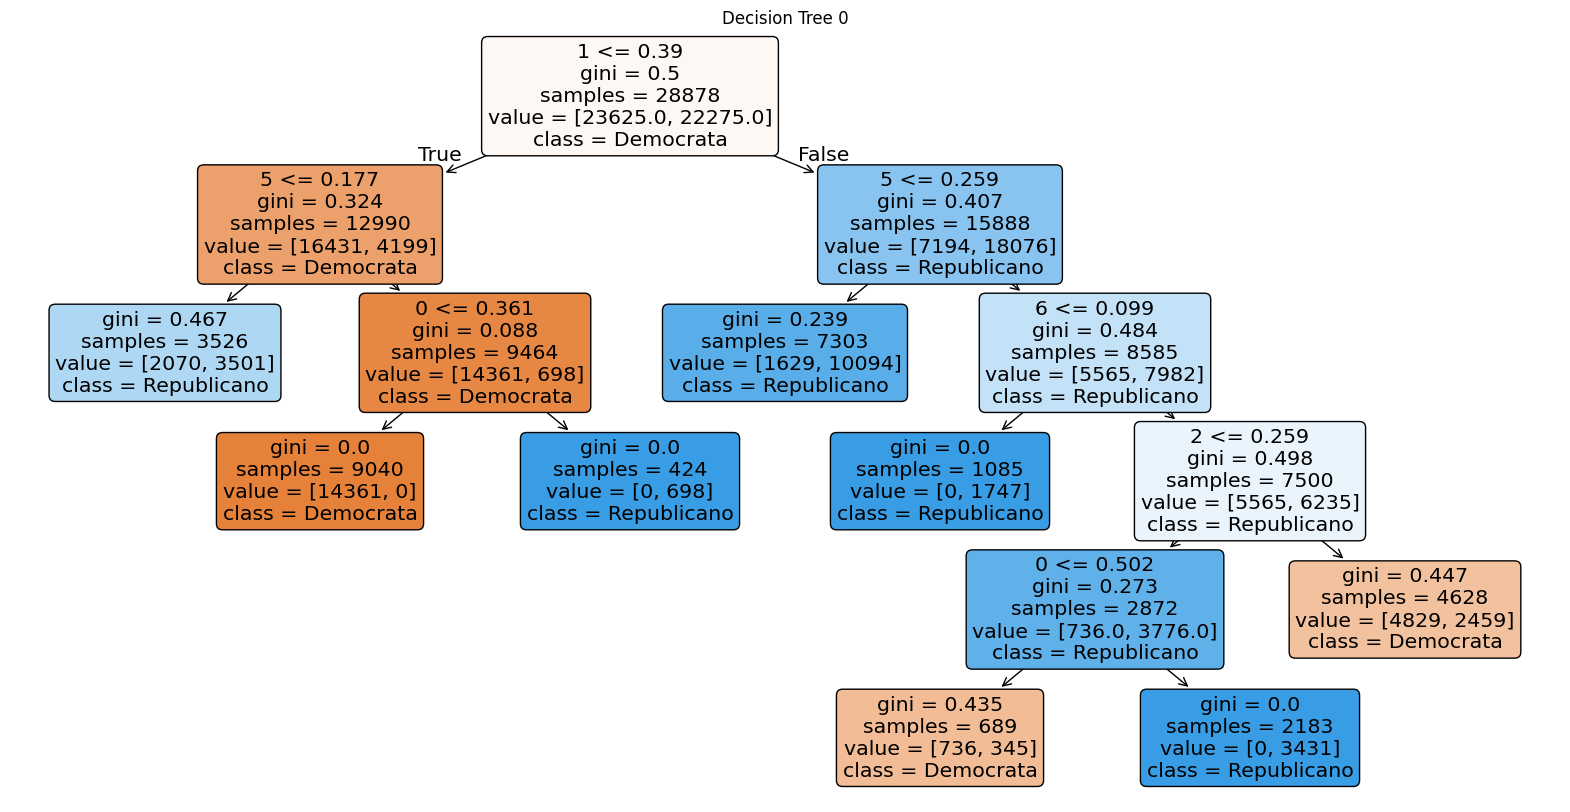

In [49]:
# Supondo que X_new já esteja definido anteriormente no código
X_new = pd.DataFrame(X_new)

# Mapeamento das classes
class_names = ["Democrata", "Republicano"]

# impressão
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=X_new.columns, class_names=class_names, rounded=True)
plt.title(f"Decision Tree {tree_index}")
plt.show()

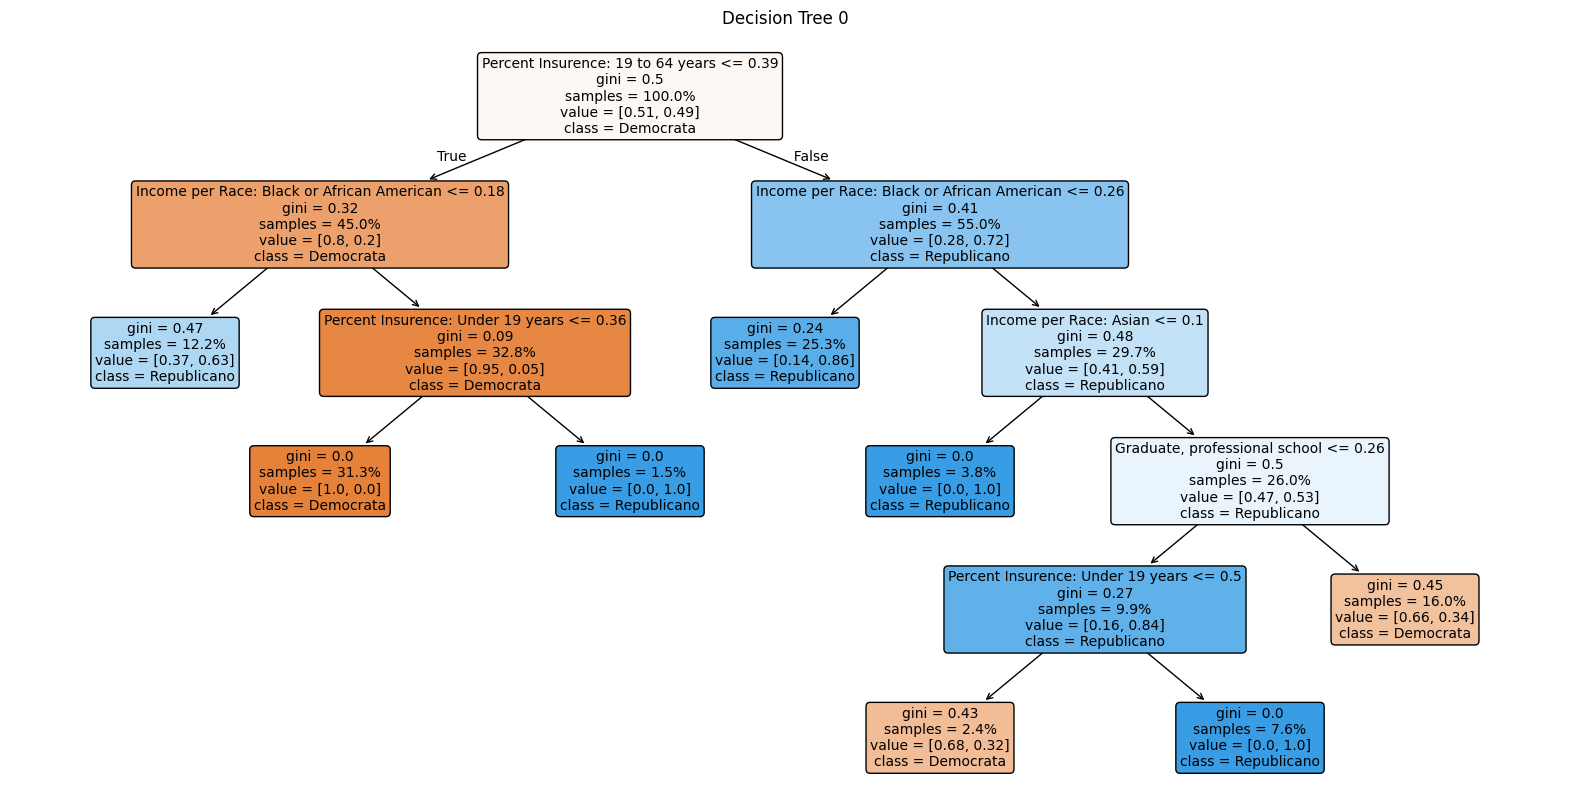

In [50]:
# Supondo que X_new e colunas_selecionadas já estejam definidos anteriormente no código
X_new = pd.DataFrame(X_new)

# Mapeamento das classes
class_names = ["Democrata", "Republicano"]

# impressão
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]

# Ajuste do tamanho da figura para melhor visualização
plt.figure(figsize=(20, 10))

# Plot da árvore de decisão com parâmetros adicionais para melhor visualização
plot_tree(
    tree_to_visualize,
    filled=True,
    feature_names=colunas_selecionadas,  # Usando os nomes reais das colunas
    class_names=class_names,             # Usando os nomes reais das classes
    rounded=True,
    proportion=True,  # Mostra a proporção de amostras em cada nó
    precision=2,      # Ajusta a precisão dos valores numéricos
    fontsize=10       # Ajusta o tamanho da fonte para melhor legibilidade
)

plt.title(f"Decision Tree {tree_index}")
plt.show()

In [51]:
# pegar só as colunas selecionadas pelo selectkbest, selecionando apenas elas do data2023
estados2023 = data2023['States']
data2023_ref = data2023[colunas_selecionadas]

In [52]:
X_2023 = data2023_ref.values

In [53]:
estados2023

0                  Alabama2023
1                   Alaska2023
2                  Arizona2023
3                 Arkansas2023
4               California2023
5                 Colorado2023
6              Connecticut2023
7                 Delaware2023
8     District of Columbia2023
9                  Florida2023
10                 Georgia2023
11                  Hawaii2023
12                   Idaho2023
13                Illinois2023
14                 Indiana2023
15                    Iowa2023
16                  Kansas2023
17                Kentucky2023
18               Louisiana2023
19                   Maine2023
20                Maryland2023
21           Massachusetts2023
22                Michigan2023
23               Minnesota2023
24             Mississippi2023
25                Missouri2023
26                 Montana2023
27                Nebraska2023
28                  Nevada2023
29           New Hampshire2023
30              New Jersey2023
31              New Mexico2023
32      

In [54]:
data2023_ref

,Percent Insurence: Under 19 years,Percent Insurence: 19 to 64 years,"Graduate, professional school",Population enrolled in college or graduate school,Income per Race: White,Income per Race: Black or African American,Income per Race: Asian,Percent below poverty level: Employed
0,0.245283,0.516484,0.104384,0.086957,0.133940,0.122252,0.440454,0.649123
1,0.528302,0.582418,0.423800,0.275920,0.338238,0.399598,0.446998,0.368421
2,0.688679,0.549451,0.265136,0.143813,0.229432,0.388623,0.524954,0.456140
3,0.509434,0.489011,0.106472,0.177258,0.058345,0.000000,0.264126,0.649123
4,0.179245,0.302198,0.561587,0.153846,0.434671,0.519988,0.719571,0.350877
5,0.264151,0.313187,0.269311,0.086957,0.374547,0.480111,0.620120,0.228070
6,0.198113,0.252747,0.693111,0.456522,0.411151,0.446561,0.764513,0.192982
7,0.330189,0.318681,0.592902,0.180602,0.279479,0.432653,0.875239,0.315789
8,0.000000,0.000000,1.000000,1.000000,1.000000,0.404146,0.600662,0.157895
9,0.584906,0.659341,0.544885,0.259197,0.198812,0.360874,0.424425,0.403509


In [55]:
previsao = modelo.predict(X_2023)
previsao_ref = ["REPUBLICANO" if x == 1 else "DEMOCRATA" for x in previsao]
previsao_ref = pd.DataFrame(previsao_ref, columns=['Vencedor'])
previsao_ref

,Vencedor
0,REPUBLICANO
1,DEMOCRATA
2,DEMOCRATA
3,REPUBLICANO
4,DEMOCRATA
5,DEMOCRATA
6,DEMOCRATA
7,DEMOCRATA
8,DEMOCRATA
9,REPUBLICANO


In [56]:
merged2023 = pd.concat([estados2023, previsao_ref], axis=1)
merged2023

,States,Vencedor
0,Alabama2023,REPUBLICANO
1,Alaska2023,DEMOCRATA
2,Arizona2023,DEMOCRATA
3,Arkansas2023,REPUBLICANO
4,California2023,DEMOCRATA
5,Colorado2023,DEMOCRATA
6,Connecticut2023,DEMOCRATA
7,Delaware2023,DEMOCRATA
8,District of Columbia2023,DEMOCRATA
9,Florida2023,REPUBLICANO


In [57]:
merged2023['States'] = merged2023['States'].str.replace('2023', '')
merged2023

,States,Vencedor
0,Alabama,REPUBLICANO
1,Alaska,DEMOCRATA
2,Arizona,DEMOCRATA
3,Arkansas,REPUBLICANO
4,California,DEMOCRATA
5,Colorado,DEMOCRATA
6,Connecticut,DEMOCRATA
7,Delaware,DEMOCRATA
8,District of Columbia,DEMOCRATA
9,Florida,REPUBLICANO


In [58]:
states_delegates = {
    "California": 54,
    "Texas": 40,
    "Florida": 30,
    "New York": 28,
    "Illinois": 19,
    "Pennsylvania": 19,
    "Ohio": 17,
    "Georgia": 16,
    "Michigan": 15,
    "North Carolina": 16,
    "New Jersey": 14,
    "Virginia": 13,
    "Washington": 12,
    "Arizona": 11,
    "Massachusetts": 11,
    "Tennessee": 11,
    "Indiana": 11,
    "Missouri": 10,
    "Maryland": 10,
    "Wisconsin": 10,
    "Colorado": 10,
    "Minnesota": 10,
    "South Carolina": 9,
    "Alabama": 9,
    "Kentucky": 8,
    "Louisiana": 8,
    "Oregon": 8,
    "Oklahoma": 7,
    "Connecticut": 7,
    "Utah": 6,
    "Iowa": 6,
    "Mississippi": 6,
    "Arkansas": 6,
    "Nevada": 6,
    "Kansas": 6,
    "New Mexico": 5,
    "Nebraska": 5,
    "West Virginia": 4,
    "Idaho": 4,
    "Hawaii": 4,
    "Maine": 4,
    "New Hampshire": 4,
    "Rhode Island": 4,
    "Montana": 4,
    "Delaware": 3,
    "South Dakota": 3,
    "North Dakota": 3,
    "Alaska": 3,
    "Vermont": 3,
    "Wyoming": 3,
    "District of Columbia": 3
}

def calcular_vencedor_eleicao(df):
    votos_rep = 0
    votos_dem = 0
    # for item in states_delegates:
    #     state = item['state']
    #     delegates = item['delegates']
    #     voto = df[df['States'] == state]['Vencedor'].values[0]
    #     if voto == 'REPUBLICANO':
    #         votos_rep += delegates
    #     else:
    #         votos_dem += delegates
    for index, row in df.iterrows():
        state = row['States']
        delegates = states_delegates[state]
        voto = row['Vencedor']
        if voto == 'REPUBLICANO':
            votos_rep += delegates
        else:
            votos_dem += delegates
            
    print(f'Votos REP: {votos_rep}')
    print(f'Votos DEM: {votos_dem}')
    
    if votos_rep > votos_dem:
        vencedor = 'REPUBLICANO'
    else:
        vencedor = 'DEMOCRATA'
        
    print(f'O vencedor foi {vencedor}, com {votos_rep} votos para o partido republicano e {votos_dem} para o partido democrata. Parabéns Kamala Harris!')


In [59]:
##analisando os swings states
swing_states = ['Arizona', 'Georgia', 'Michigan',  'Nevada', 'North Carolina', 'Pennsylvania', 'Wisconsin']

for state in swing_states:
    print('Vencedor do estado', state, ':', merged2023.loc[merged2023['States'] == state, 'Vencedor'].values[0], 'ganhando', states_delegates[state], 'delegados')

Vencedor do estado Arizona : DEMOCRATA ganhando 11 delegados
Vencedor do estado Georgia : DEMOCRATA ganhando 16 delegados
Vencedor do estado Michigan : REPUBLICANO ganhando 15 delegados
Vencedor do estado Nevada : DEMOCRATA ganhando 6 delegados
Vencedor do estado North Carolina : DEMOCRATA ganhando 16 delegados
Vencedor do estado Pennsylvania : DEMOCRATA ganhando 19 delegados
Vencedor do estado Wisconsin : DEMOCRATA ganhando 10 delegados


In [60]:
calcular_vencedor_eleicao(merged2023)

Votos REP: 220
Votos DEM: 318
O vencedor foi DEMOCRATA, com 220 votos para o partido republicano e 318 para o partido democrata. Parabéns Kamala Harris!
